# Audit Analysis Project

### Importing libraries

In [2]:
import pandas as pd

### Importing Datasets

In [4]:
# General Ledger dataset
gl_df = pd.read_csv('../data/general_ledger.csv', parse_dates=["date"])

# Vendors Dataset
vendors_df = pd.read_csv('../data/vendors.csv')

# Payments Dataset
payments_df = pd.read_csv('../data/vendor_payments.csv', parse_dates=["payment_date"])

# Expenses Dataset
expenses_df = pd.read_csv('../data/employee_expenses.csv', parse_dates=["date"])

### Viewing the Datasets

In [7]:
gl_df.head()

,date,time,user,account,amount,description
0,2025-02-01,03:35:16,guerreroashley,1001-Cash,-47498.92,Scene there much reach.
1,2025-03-04,15:24:28,jennifermiller,5001-COGS,-25510.81,Anything care today possible seek vote form.
2,2024-10-21,21:49:39,kmcbride,4001-Revenue,23647.12,Politics remain factor reason boy.
3,2025-03-20,09:57:20,jose05,3001-Equity,-41306.12,Time way body cultural game floor.
4,2024-12-06,19:53:47,elowe,2001-AP,-46821.73,Reveal gas cut water most actually think great.


In [8]:
vendors_df.head()

,vendor_id,vendor_name
0,6d26ff75-100e-482a-847d-4f861a697158,"Calderon, Andersen and Orozco"
1,3c6388fc-f50c-4196-ad78-58fe867c0919,"Simpson, Wilcox and Johnson"
2,ad675cd9-8696-4a5d-a1b8-2afa5499e9cc,"Wade, Silva and Young"
3,cbf1d728-0039-49d9-80df-473849773197,Burns Inc
4,d666f295-d7d6-427d-bf63-aae378afc7f5,"Wells, Mills and Guzman"


In [9]:
payments_df.head()

,vendor_id,vendor_name,payment_date,amount,invoice_no
0,f953a74c-d90f-4baf-a4b9-f7b6fba0e5fa,"Best, White and Moss",2025-01-02,4191.68,INV-2099
1,483ae855-84c2-400b-ae8a-28825777dbf5,Peterson-Harris,2024-11-15,7201.84,INV-0697
2,261a092d-8440-4317-95a8-c1d8a2322300,"Gray, Fernandez and Golden",2025-02-02,1095.39,INV-3292
3,196745c8-ba6c-4e1b-9b6a-bfb44f67175d,"Leach, Stephens and Jackson",2024-11-29,7730.58,INV-7464
4,d35622d2-003b-456a-b12f-813f8aa1edf8,Moran Inc,2025-04-05,151.30,INV-7704


In [10]:
expenses_df.head()

,employee_id,employee_name,date,category,amount,description
0,9994,Regina Morgan,2024-11-26,Entertainment,1580.26,Usually structure major success pretty.
1,1635,Casey Jones,2025-03-07,Travel,903.64,Inside painting receive not possible.
2,5151,Vanessa Kelly,2024-12-05,Entertainment,1168.67,What start focus her boy.
3,1778,Mark Sanchez,2025-01-16,Entertainment,1091.85,Short include collection.
4,2900,Margaret Bush,2024-11-12,Supplies,1406.25,Truth win serious stand think.


## General Ledger Audits

### Duplicate Journal Entries

In [13]:
duplicate_gl = gl_df[gl_df.duplicated(subset=['date', 'time', 'user', 'account', 'amount', 'description'], keep=False)]

f"Found {len(duplicate_gl)} duplicate journal entries"
# duplicate_gl.sort_values(by=["date", "time"]).head() # use this if there are > 0 entries to view them

'Found 0 duplicate journal entries'

### Weekend/Holidays Postings

In [14]:
# Extracting Weekdays (0= Monday)
gl_df['weekday'] = gl_df['date'].dt.weekday

gl_df

,date,time,user,account,amount,description,weekday
0,2025-02-01,03:35:16,guerreroashley,1001-Cash,-47498.92,Scene there much reach.,5
1,2025-03-04,15:24:28,jennifermiller,5001-COGS,-25510.81,Anything care today possible seek vote form.,1
2,2024-10-21,21:49:39,kmcbride,4001-Revenue,23647.12,Politics remain factor reason boy.,0
3,2025-03-20,09:57:20,jose05,3001-Equity,-41306.12,Time way body cultural game floor.,3
4,2024-12-06,19:53:47,elowe,2001-AP,-46821.73,Reveal gas cut water most actually think great.,4
...,...,...,...,...,...,...,...
995,2024-12-20,08:10:40,johnsonsarah,4001-Revenue,-39077.34,Those tax until.,4
996,2024-11-05,09:17:50,ricky47,3001-Equity,-26071.79,All gas big those.,1
997,2025-02-10,11:12:18,susanallen,1001-Cash,16983.40,Live structure natural occur material by mouth...,0
998,2025-03-19,03:42:28,fmaynard,3001-Equity,-27432.84,Society film recently arm travel and month.,2


In [15]:
weekend_postings = gl_df[gl_df['weekday'] >= 5]

f"{len(weekend_postings)} entries were posted on weekends"

'290 entries were posted on weekends'

In [16]:
weekend_postings[['date', 'time', 'user', 'account', 'amount']].head()

,date,time,user,account,amount
0,2025-02-01,03:35:16,guerreroashley,1001-Cash,-47498.92
8,2024-12-01,18:37:32,tlee,3001-Equity,-8048.02
20,2025-03-02,23:21:48,laurathompson,5001-COGS,32940.47
21,2025-02-02,06:45:06,simonrussell,3001-Equity,38545.17
23,2024-12-07,22:35:15,harperjames,1001-Cash,-45417.56


### Late-Night Journal Entries

In [17]:
# Convert time to hour
gl_df['hour'] = pd.to_datetime(gl_df['time'], format="%H:%M:%S").dt.hour # Creates new column 'hour'
late_night_entries = gl_df[(gl_df['hour'] >= 22) | (gl_df['hour'] <= 5)] # save the records which was done after 22:00 and before 05:00

f"{len(late_night_entries)} entries posted between 10PM & 5 AM"


'344 entries posted between 10PM & 5 AM'

In [18]:
late_night_entries[['date', 'time', 'user', 'account', 'amount']].head()

,date,time,user,account,amount
0,2025-02-01,03:35:16,guerreroashley,1001-Cash,-47498.92
11,2024-12-19,01:56:53,virginiaweiss,4001-Revenue,19813.94
14,2025-01-29,22:38:06,kim90,5001-COGS,-39778.97
20,2025-03-02,23:21:48,laurathompson,5001-COGS,32940.47
23,2024-12-07,22:35:15,harperjames,1001-Cash,-45417.56


### Suspense Account Usage

In [21]:
# Filter for suspense account
suspense_account = gl_df[gl_df['account'].str.contains('9999', na=False)]

f"{len(suspense_account)} entries posted to Suspense account"


# suspense_account[['date', 'user', 'account', 'amount', 'description']].head() # run when more than 0 entries

'0 entries posted to Suspense account'

### Large-Value Entries

In [24]:
# set a threshold
threshold = 10000
large_entries = gl_df[gl_df['amount'].abs() > threshold]

f"{len(large_entries)} entries exceed ±{threshold}"

'789 entries exceed ±10000'

In [26]:
large_entries[['date', 'user', 'account', 'amount']].sort_values(by='amount', ascending=False).head()

,date,user,account,amount
867,2024-10-25,cooperashley,2001-AP,49959.50
403,2025-01-21,benjaminfowler,1001-Cash,49957.24
499,2025-02-08,dennis49,4001-Revenue,49937.36
448,2025-02-16,stephenwalker,3001-Equity,49890.23
143,2025-01-19,twagner,3001-Equity,49845.44


### Missing/Vague Descriptions

In [29]:
# Define Vague Keywords
vague_keywords = ['misc', 'adjustment', 'test', 'unknown']

# Filter entries with vague keywords or missing descriptions
gl_df['desc_clean'] = gl_df['description'].fillna('').str.lower()

vague_entries = gl_df[
    gl_df['desc_clean'].str.strip().eq('') | # description missing
    gl_df['desc_clean'].str.contains('|'.join(vague_keywords)) # description including vague_keywords
]

f"{len(vague_entries)} entries have vague or missing descriptions"

'2 entries have vague or missing descriptions'

In [30]:
vague_entries[['date', 'user', 'amount', 'description']].head()

,date,user,amount,description
345,2025-03-21,oharris,-30845.9,Test either say husband.
440,2025-01-24,phillipserin,-11641.4,Single true test better.


### Round-Number Entries

In [31]:
# Round numbers without cents/fils etc
round_entries = gl_df[gl_df['amount'] % 1000 == 0]

f"{len(round_entries)} entries are round thousand values"

# round_entries[['date', 'account', 'amount', 'description']].head() # run if more than 0 entries 

'0 entries are round thousand values'

### Top Users/Employees posting by Amount

In [40]:
top_users = gl_df.groupby('user')['amount'].sum().abs().sort_values(ascending=False).head(5)

print("Top 5 users by total posted amount:")
print(top_users)

Top 5 users by total posted amount:
user
qsmith            56107.63
cooperashley      49959.50
benjaminfowler    49957.24
dennis49          49937.36
stephenwalker     49890.23
Name: amount, dtype: float64


### Benford's Law Test (Fraud Analytics)

In [41]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [42]:
# Filter positive amounts
amounts = gl_df['amount'].abs()
first_digits = amounts[amounts > 0].astype(str).str[0].astype(int)

# Actual Distribution
actual = first_digits.value_counts(normalize=True).sort_index()

# Benford expected distribution
benford = pd.Series([np.log10(1 + 1/d) for d in range(1, 10)], index=range(1, 10))

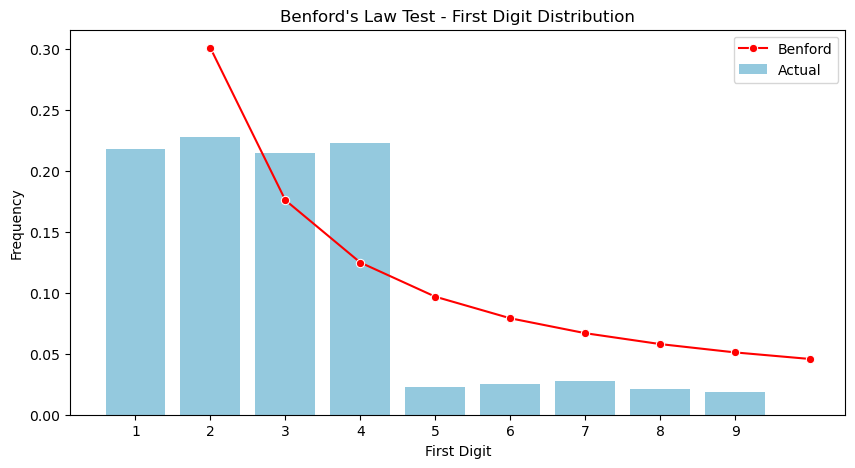

In [43]:
# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=benford.index, y=actual.values, color='skyblue', label='Actual')
sns.lineplot(x=benford.index, y=benford.values, color='red', label='Benford', marker='o')
plt.title("Benford's Law Test - First Digit Distribution")
plt.xlabel("First Digit")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Vendor Payments Audit Checks
### Duplicate Vendor Payments

In [44]:
# Check for duplicates across vendors
duplicate_payments = payments_df[
    payments_df.duplicated(subset=["vendor_id", "amount", "payment_date"], keep=False)
]

f"Found {len(duplicate_payments)} duplicate vendor payments"

# duplicate_payments.sort_values(by="payment_date").head() # run when payment > 0

'Found 0 duplicate vendor payments'

### Payments Above Threshold

In [46]:
# Set Threshold
high_payment_threshold = 15000
high_payments = payments_df[payments_df["amount"] > high_payment_threshold]

f"Found {len(high_payments)} payments above {high_payment_threshold}"

# high_payments[['payment_date', 'vendor_id', 'amount']].sort_values(by="amount", ascending=False).head() # run when payments > 0

'Found 0 payments above 15000'

### One-time Vendors with High Payments

In [50]:
# Count number of payments per vendor
payment_counts = payments_df['vendor_id'].value_counts()

# Filter one-time vendors
one_time_vendors = payment_counts[payment_counts == 1].index
one_time_payments = payments_df[payments_df['vendor_id'].isin(one_time_vendors)]

# High one-time payments
high_one_time = one_time_payments[one_time_payments['amount'] > 10000]

f"{len(high_one_time)} one-time vendors received high payments"

# high_one_time[['vendor_id', 'amount', 'payment_date']].head() # run when payments > 0

'0 one-time vendors received high payments'

### Payments on Weekend

In [51]:
# Get the weekdays
payments_df['weekday'] = payments_df['payment_date'].dt.weekday
weekend_payments = payments_df[payments_df['weekday'] >= 5]

f"{len(weekend_payments)} vendor payments made on weekends"

'138 vendor payments made on weekends'

In [52]:
weekend_payments[['vendor_id', 'amount', 'payment_date']].head()

,vendor_id,amount,payment_date
2,261a092d-8440-4317-95a8-c1d8a2322300,1095.39,2025-02-02
4,d35622d2-003b-456a-b12f-813f8aa1edf8,151.30,2025-04-05
6,a061fa2b-2409-49a5-b3f7-2d3c511a158e,9298.09,2024-11-30
7,d2059752-7407-4ef2-bd01-527e5f95a105,4128.38,2025-02-01
13,fc835178-1b21-4a36-aa2a-2d522d2ca7ea,3279.56,2025-01-04


### Round-Amount Payments

In [54]:
round_payments = payments_df[payments_df['amount'] % 1000 == 0]

f"{len(round_payments)} payments are round thousands (possible manipulation)"

# round_payments[['vendor_id', 'amount', 'payment_date']].head() # run when payments > 0

'0 payments are round thousands (possible manipulation)'

### Split-Payments (same Vendor, same Date)

In [55]:
# Group by vendor + date and count
split_payments = payments_df.groupby(['vendor_id', 'payment_date'])['amount'].count()
split_payments = split_payments[split_payments > 1]

f"{len(split_payments)} vendors paid multiple times on same day"

'15 vendors paid multiple times on same day'

In [56]:
split_payments.head()

vendor_id                             payment_date
07a7324d-7d8d-4d11-a632-bad3ad18ee42  2024-12-30      2
261a092d-8440-4317-95a8-c1d8a2322300  2024-10-22      2
3bbefcd9-ad61-462c-bacf-1c78b3a65ed5  2025-01-15      2
3c6388fc-f50c-4196-ad78-58fe867c0919  2024-10-19      2
483ae855-84c2-400b-ae8a-28825777dbf5  2025-03-15      2
Name: amount, dtype: int64

### Top Vendors by Amount Paid

In [57]:
top_vendors = payments_df.groupby('vendor_id')['amount'].sum().sort_values(ascending=False).head(5)

"Top 5 vendors by total payment amount:"
print(top_vendors)

vendor_id
e7ac4fe5-69a9-4e8c-9cbc-d71db2f9cd1d    101018.27
899f4d6a-4ee3-4130-ba3b-44dd574bc706     89988.28
f953a74c-d90f-4baf-a4b9-f7b6fba0e5fa     84969.61
354e3586-d172-4f79-8a23-38c07de8c029     78232.52
97aab957-8804-486f-a5ac-27dd46628da1     75670.57
Name: amount, dtype: float64


## Employee Expense Audit Checks

### Duplicate expense claims

In [59]:
# Duplicate check based on employee_id, date and amount
duplicate_expenses = expenses_df[
    expenses_df.duplicated(subset=["employee_id", "date", "amount"], keep=False)
]

f"Found {len(duplicate_expenses)} duplicate expense claims"

# duplicate_expenses.sort_values(by="date").head() # run if expenses claims > 0

'Found 0 duplicate expense claims'

### Expenses above policy limits

Assuming:
* Meals: max 100
* Travel: max 1000
* Lodging: max 500

In [61]:
policy_limits = {
    'meals': 100,
    'travel': 1000,
    'lodging': 500
}

# Flag Policy Violations
policy_violations = expenses_df[
    expenses_df.apply(lambda row: row['amount'] > policy_limits.get(row['category'], 999999), axis=1)
]

f"Found {len(policy_violations)} expense claims above policy limits"
# policy_violations[['employee_id', 'category', 'amount', 'description']].head() # run if expense claims > 0 

'Found 0 expense claims above policy limits'

### Claims on weekends

In [62]:
expenses_df['weekday'] = expenses_df['date'].dt.weekday
weekend_claims = expenses_df[expenses_df['weekday'] >= 5]

f"Found {len(weekend_claims)} expense claims made on weekends"

'Found 90 expense claims made on weekends'

In [63]:
weekend_claims[['employee_id', 'category', 'amount', 'date']].head()

,employee_id,category,amount,date
9,3349,Entertainment,1933.95,2025-02-02
12,6792,Travel,524.89,2025-04-06
13,8657,Meals,897.10,2024-11-24
14,5758,Entertainment,931.50,2024-12-29
19,2853,Meals,703.17,2024-11-30


### Suspicious or Vague descriptions

In [65]:
vague_keywords = ['misc', 'test', 'n/a', 'adjustment', 'na']

expenses_df['desc_clean'] = expenses_df['description'].fillna('').str.lower()

vague_expenses = expenses_df[
    expenses_df['desc_clean'].str.strip().eq('') |
    expenses_df['desc_clean'].str.contains('|'.join(vague_keywords))
]

print(f"{len(vague_expenses)} expense claims have vague or suspicious descriptions")
vague_expenses[['employee_id', 'amount', 'description']].head()


18 expense claims have vague or suspicious descriptions


,employee_id,amount,description
12,6792,524.89,Improve thing task international forward.
45,7044,710.45,National option baby industry leg.
89,9019,585.77,Light soon activity fall power professional.
96,6124,1658.68,Position scientist card something analysis.
99,7223,909.46,Usually week religious property although natural.


### Round-amount claims

In [67]:
round_expenses = expenses_df[expenses_df['amount'] % 100 == 0]

f"{len(round_expenses)} claims are round hundreds - investigate estimates/fraud"
# round_expenses[['employee_id', 'category', 'amount']].head() # run if claims > 0

'0 claims are round hundreds - investigate estimates/fraud'

### Frequent small claims (threshold alert)

In [70]:
# set small claims limit
small_claims = expenses_df[expenses_df['amount'] <= 25]

frequent_small_claims = small_claims['employee_id'].value_counts()
frequent_small_claims = frequent_small_claims[frequent_small_claims >= 3]

print(f"Employees with 3+ small claims (<= 25):")
frequent_small_claims

Employees with 3+ small claims (<= 25):


Series([], Name: count, dtype: int64)

### Top spenders by total claim amount

In [71]:
top_claimers = expenses_df.groupby('employee_id')['amount'].sum().sort_values(ascending=False).head(5)

print("Top 5 employees by total expense claimed:")
top_claimers

Top 5 employees by total expense claimed:


employee_id
8916    1995.60
5176    1983.76
4670    1978.91
4342    1973.90
1330    1948.88
Name: amount, dtype: float64

### Expense timing (late night or backdated claims)

In [74]:
# Claims after 10PM or backdated by more than 30 days are red flags
# Time Check
expenses_df['hour'] = pd.to_datetime(expenses_df['date'], format='%H:%M:%S').dt.hour

late_night_claims = expenses_df[(expenses_df['hour'] >= 22) | (expenses_df['hour'] <= 5)]

f"Found {len(late_night_claims)} late-night expense claims"

'Found 300 late-night expense claims'

In [76]:
late_night_claims[['employee_id', 'amount', 'date']].head()

,employee_id,amount,date
0,9994,1580.26,2024-11-26
1,1635,903.64,2025-03-07
2,5151,1168.67,2024-12-05
3,1778,1091.85,2025-01-16
4,2900,1406.25,2024-11-12


## Exporting all the data we generated for creation of Dashboard in Excel

In [79]:
# Create folders if not exists
import os

os.makedirs("../audit_report", exist_ok=True)

excel_path = "../audit_report/audit_analysis_report.xlsx"

with pd.ExcelWriter(excel_path, engine="openpyxl") as writer:
    gl_df.to_excel(writer, sheet_name="General Ledger", index=False)
    payments_df.to_excel(writer, sheet_name="Vendor Payments", index=False)
    expenses_df.to_excel(writer, sheet_name="Employee Expenses", index=False)